In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
data=pd.read_csv('./CarPrice_Assignment[1].csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [60]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [61]:
data.drop(['car_ID'],axis=1,inplace=True)

In [62]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There no null values found.

## Data Processing

<Axes: xlabel='price'>

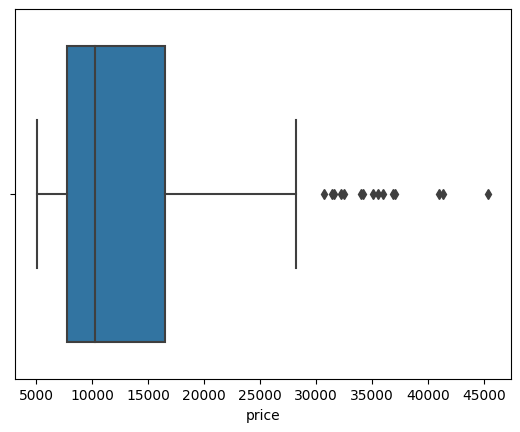

In [63]:
sns.boxplot(x=data['price'])

It looks like we have some outliers in this observation.

In [64]:
z_score=stats.zscore(data['price'])
data[np.abs(z_score)>3]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


We have three ouliers.

<Axes: xlabel='price', ylabel='Density'>

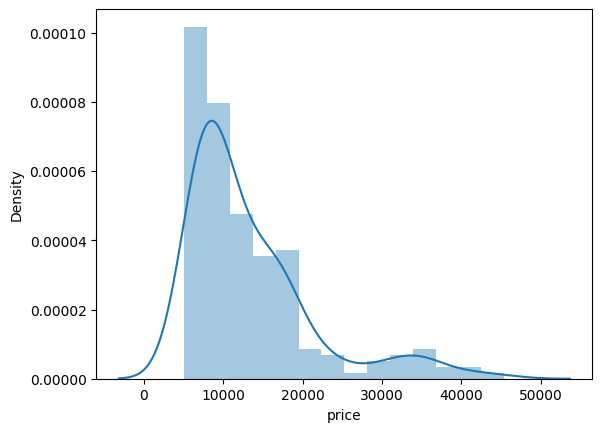

In [65]:
sns.distplot(data['price'])

We see that the data is skewed. So we use log function for normalization.

## Exploratory Data Analysis

### 1. Numeric Data

<Axes: >

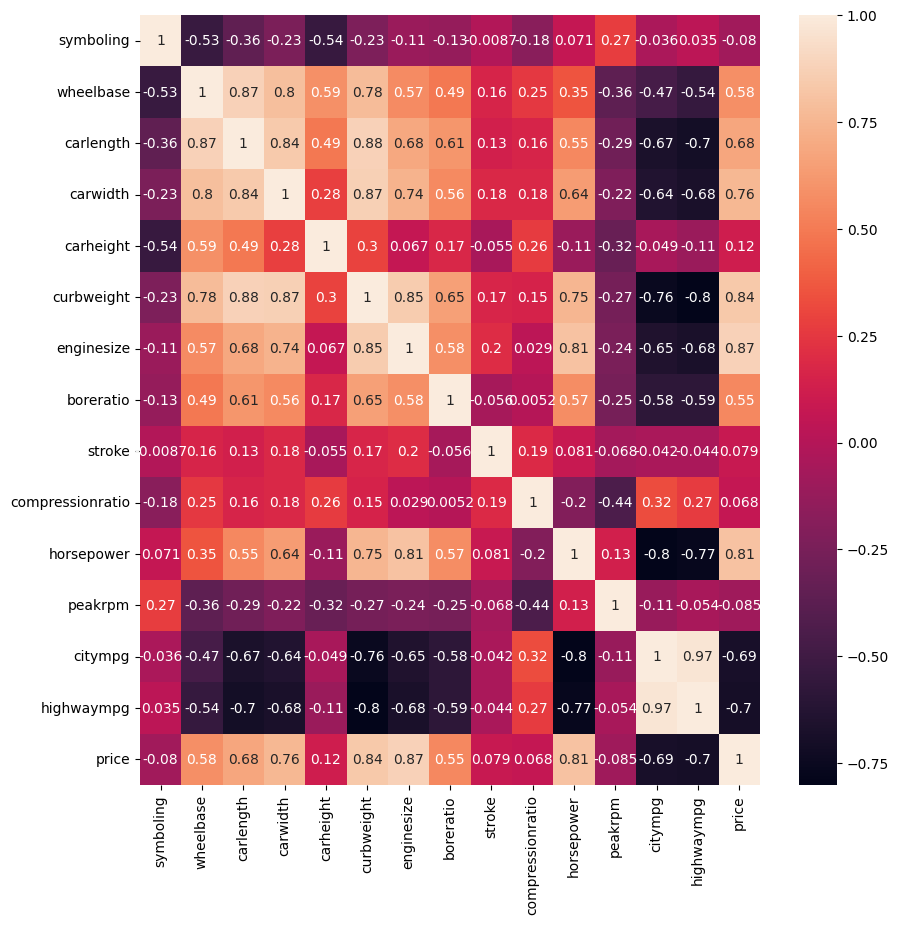

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(data._get_numeric_data().corr(),annot=True)

We see that price is highly correlated with carlength, carwidth, horesepower, boreratio, wheelbase citympg and highwaympg.

Lets reduce the dimensionality using PCA

In [67]:
pca_col= ["enginesize", "curbweight", "horsepower",
               "carwidth", "carlength", "wheelbase",
               "boreratio", "citympg", "highwaympg"]
data_pca=data[pca_col]
data_pca.head()

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,citympg,highwaympg
0,130,2548,111,64.1,168.8,88.6,3.47,21,27
1,130,2548,111,64.1,168.8,88.6,3.47,21,27
2,152,2823,154,65.5,171.2,94.5,2.68,19,26
3,109,2337,102,66.2,176.6,99.8,3.19,24,30
4,136,2824,115,66.4,176.6,99.4,3.19,18,22


In [68]:
pca_train=PCA(n_components=1)
pca_component=pca_train.fit_transform(data_pca)
principal_data=pd.DataFrame(data=pca_component, columns=['pca1'])
principal_data.head()

,pca1
0,-7.057267
1,-7.057267
2,270.841223
3,-218.880370
4,268.738449


Using PCA we reduce the 9 variables into a single variable


In [69]:
rest_numeric=data._get_numeric_data().drop(pca_col,axis=1)
rest_numeric.head()

,symboling,carheight,stroke,compressionratio,peakrpm,price
0,3,48.8,2.68,9.0,5000,13495.0
1,3,48.8,2.68,9.0,5000,16500.0
2,1,52.4,3.47,9.0,5000,16500.0
3,2,54.3,3.40,10.0,5500,13950.0
4,2,54.3,3.40,8.0,5500,17450.0


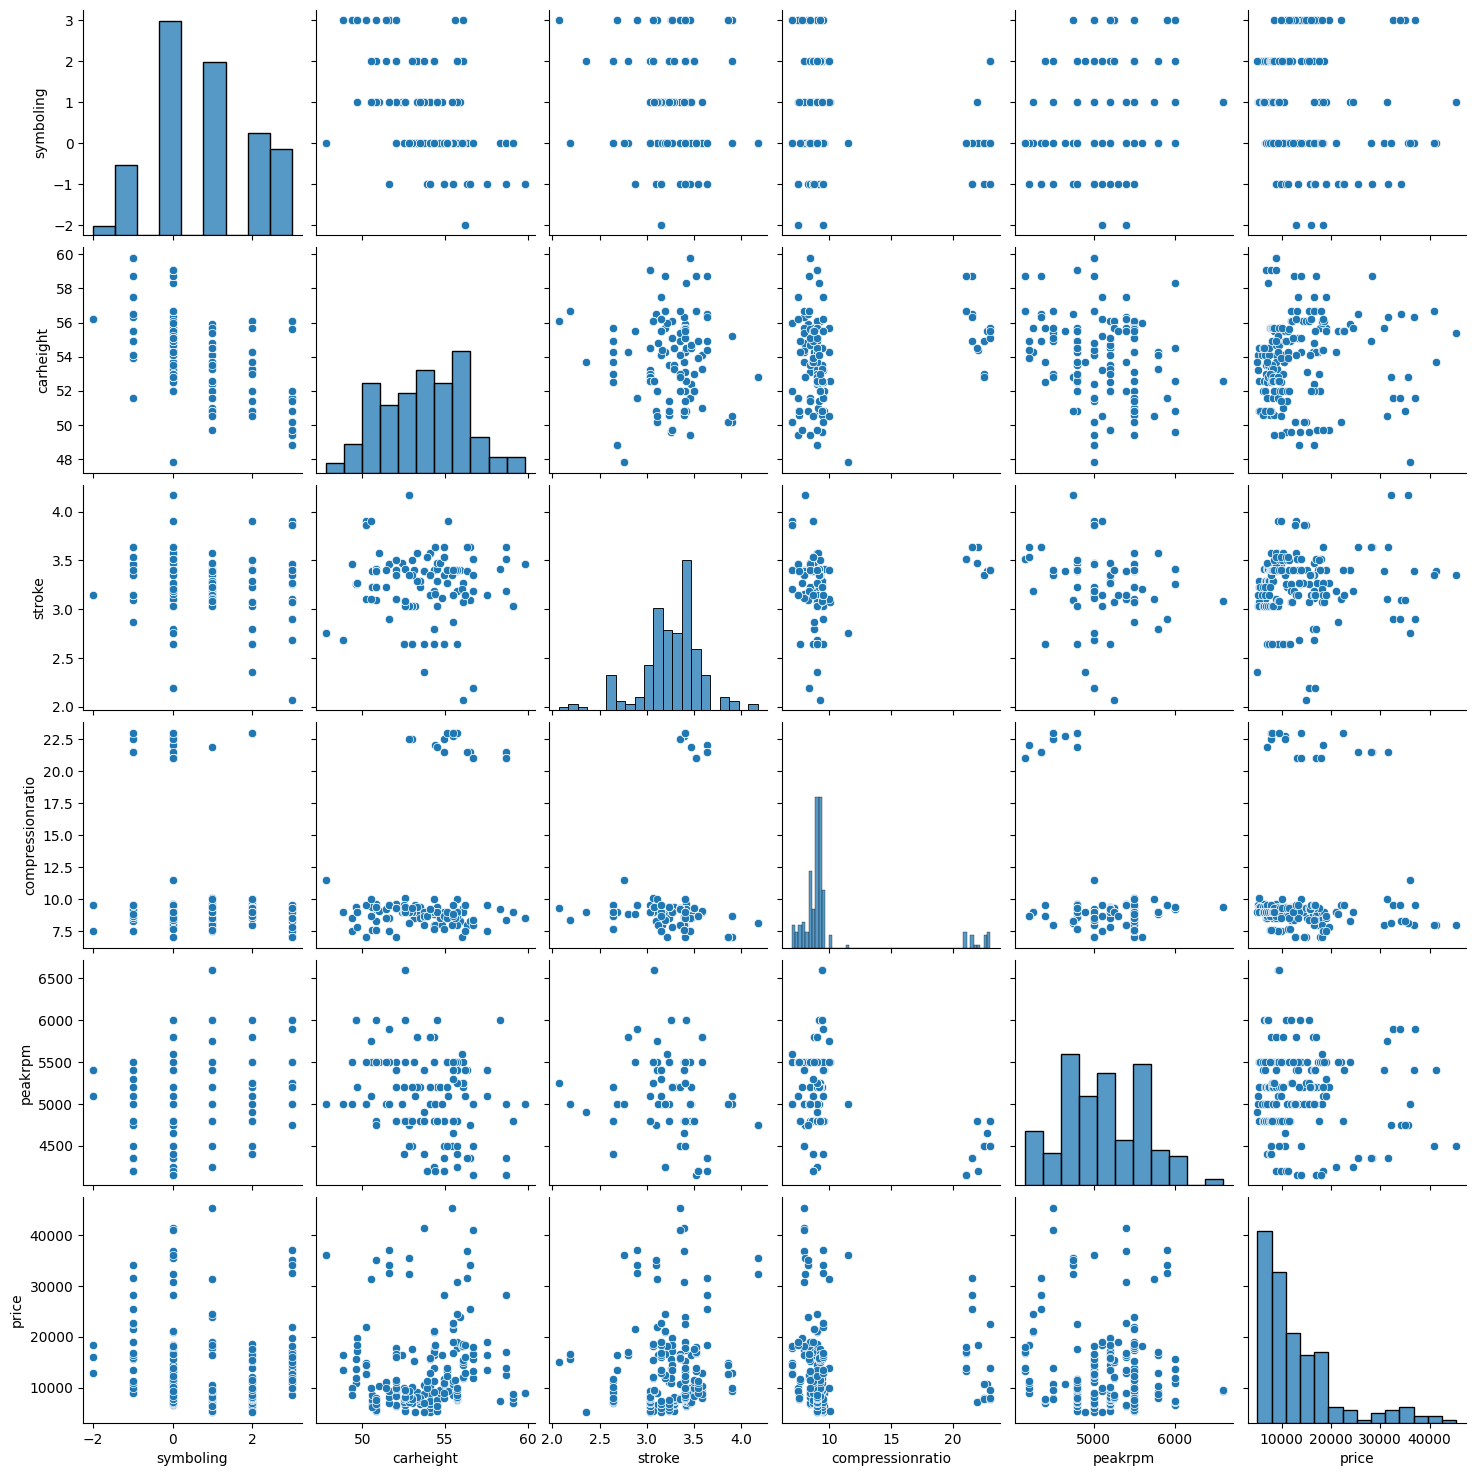

In [70]:
sns.pairplot(rest_numeric)

There are no correlation or pattern between these data.

### 2. Categorical Data

In [71]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data = categorical_data.drop('CarName', axis=1)
categorical_data=pd.concat([categorical_data, data['price']], axis=1)
categorical_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


In [72]:
dummy_categorical = pd.get_dummies(categorical_data)

<Axes: >

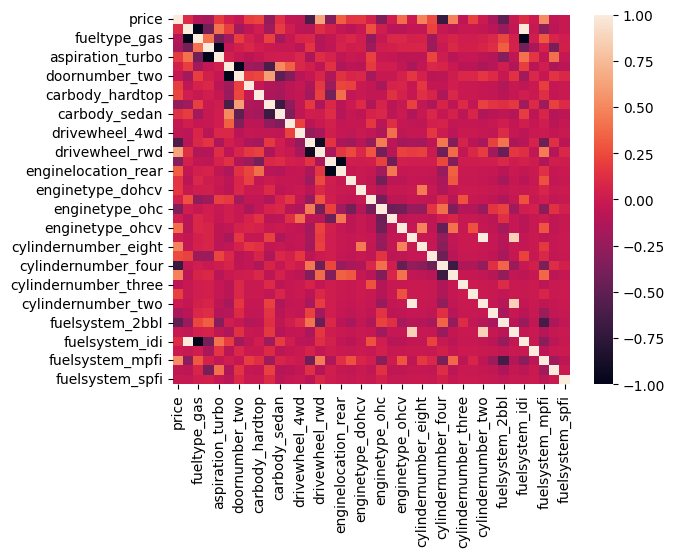

In [73]:
dummy_corr=dummy_categorical.corr()
sns.heatmap(dummy_corr)

The matrix is too complex.

Lets us filter out the variables with correlation **>0.5 or <-0.5**

In [74]:
positive_corr = dummy_corr.sort_values('price', )[dummy_corr['price']>0.5]['price']
negative_corr =  dummy_corr.sort_values('price', )[dummy_corr['price']<-0.5]['price']
corelated_columns=list(negative_corr.index)+list(positive_corr.index)
corelated_columns

['cylindernumber_four',
 'drivewheel_fwd',
 'fuelsystem_2bbl',
 'fuelsystem_mpfi',
 'drivewheel_rwd',
 'price']

<Axes: >

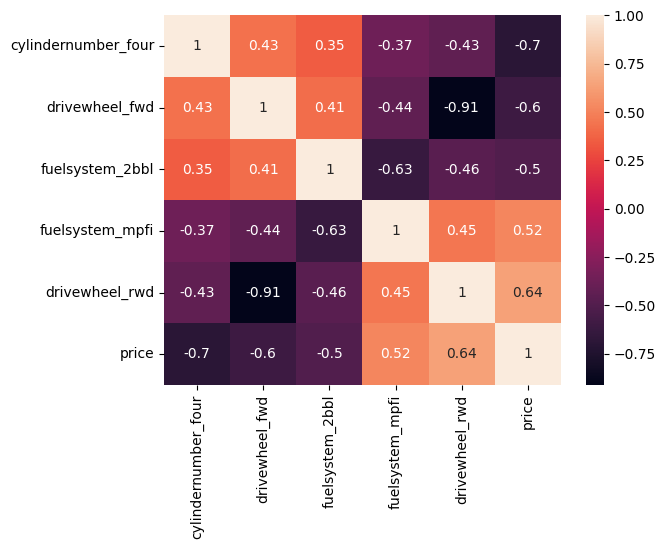

In [75]:
sns.heatmap(dummy_corr[corelated_columns].loc[corelated_columns],annot=True)

There is high colinearity between (drivewheel_fwd) and (drivewheel_rwd)

So we use drivewheel_fwd

Now combinig the pca colums and the corelated columns

In [76]:
new_data=pd.concat([principal_data,dummy_categorical[corelated_columns]],axis=1)
new_data.drop('drivewheel_fwd',axis=1,inplace=True)
new_data.head()

,pca1,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi,drivewheel_rwd,price
0,-7.057267,1,0,1,1,13495.0
1,-7.057267,1,0,1,1,16500.0
2,270.841223,0,0,1,1,16500.0
3,-218.880370,1,0,1,0,13950.0
4,268.738449,0,0,1,0,17450.0


Now we shall convert the true/false value to 1/0

In [77]:
def mapping(x):
    if x==True:
        return 1
    return 0

for col in ['cylindernumber_four','fuelsystem_2bbl','fuelsystem_mpfi','drivewheel_rwd']:
    new_data[col]=new_data[col].apply(mapping)
new_data.head()

,pca1,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi,drivewheel_rwd,price
0,-7.057267,1,0,1,1,13495.0
1,-7.057267,1,0,1,1,16500.0
2,270.841223,0,0,1,1,16500.0
3,-218.880370,1,0,1,0,13950.0
4,268.738449,0,0,1,0,17450.0


## Train Test Split

In [78]:
x=new_data.drop('price',axis=1)
y=new_data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

### Model Training and Testing

In [79]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)

In [80]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.7393362684964675

## Conclusion

The model has a r2 score of 73.93%